# Taxi Services in Chicago

In this analysis, I will explore taxi trip data to uncover key trends in ride demand, company performance, and the impact of external factors on trip duration. By examining these trip counts across different taxi companies, I will identify the leading service providers and their market share, I will also analyze the most popular drop-off locations to understand high-demand areas in the city. Finally, I will conduct a statistical test to determine whether weather conditions significantly affect trip durations on Saturdays. This study provides valuable insights that can help improve taxi operations, optimize service strategies, and better understand ride patterns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import ttest_ind

In addition to the data retrieved in previous tasks, a second file was assigned for analysis which contained the following two CSVs:

1) `/datasets/project_sql_result_01.csv`, which contains:  
    - a) `company_name`: the taxi company name, and  
    - b) `trips_amount`: the number of rides for each taxi company on November 15-16, 2017.  

2) `/datasets/project_sql_result_04.csv`, which contains:  
    - a) `dropoff_locations_name`: Chicago neighborhoods where rides ended, and  
    - b) `average_trips`: the average number of rides that ended in each neighborhood in November 2017.  

In [3]:

try:
    result_01= pd.read_csv('/datasets/project_sql_result_01.csv')
except:
    result_01= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_01.csv')


try:
    result_02= pd.read_csv('/datasets/project_sql_result_04.csv')
except:
    result_02= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_04.csv')


try:
    result_03= pd.read_csv('/datasets/project_sql_result_07.csv')
except:
    result_03= pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/project_sql_result_07.csv')

print(result_01.head())
print(result_02.head())
print(result_03.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


Three CSV files containing taxi trip data were loaded into pandas DataFrames (result_01, result_02, and result_03). The datasets contain information on taxi companies and the number of trips, average trips per drop-off location, and ride details including timestamps, weather conditions, and trip durations.

In [4]:
result_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
result_01

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [6]:
result_01_duplicates= result_01.duplicated().sum()
result_01_duplicates

0

In [7]:
result_01['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

In [8]:
result_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [9]:
result_02

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [10]:
result_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [11]:
result_02_duplicates= result_02.duplicated().sum()
result_02_duplicates

0

In [12]:
result_02['average_trips'].describe()

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

The dataset result_01 was analyzed by checking its structure using .info(), displaying its contents, checking for duplicate rows, and generating descriptive statistics for the trips_amount column. The dataset result_02 was examined by displaying its contents, checking for duplicates, and computing summary statistics for the average_trips column. The dataset structure was assessed using .info() to understand data types and completeness.

In [13]:
result_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
result_03['start_ts']= pd.to_datetime(result_03['start_ts'])
result_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [15]:
result_03

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [16]:
result_03['dow']= result_03['start_ts'].dt.day_name()
print(result_03.head())

             start_ts weather_conditions  duration_seconds       dow
0 2017-11-25 16:00:00               Good            2410.0  Saturday
1 2017-11-25 14:00:00               Good            1920.0  Saturday
2 2017-11-25 12:00:00               Good            1543.0  Saturday
3 2017-11-04 10:00:00               Good            2512.0  Saturday
4 2017-11-11 07:00:00               Good            1440.0  Saturday


In [17]:
result_03_duplicates= result_03.duplicated().sum()
result_03_duplicates

197

In [18]:
result_03.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1063    False
1064    False
1065     True
1066     True
1067    False
Length: 1068, dtype: bool

The result_03 dataset was analyzed checking its structure using .info() to understand its data types. I also converted the start_ts column to a datetime format using pd.to_datetime() I also extracted the day of the week from start_ts and storing it in a new column called dow using .dt.day_name(). i checked for duplicate rows in result_03 using .duplicated().sum(), revealing that there are 197 duplicate entries.

In [19]:
top_taxi_companies = result_01.sort_values(by='trips_amount', ascending=False).head(10)
print(top_taxi_companies)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


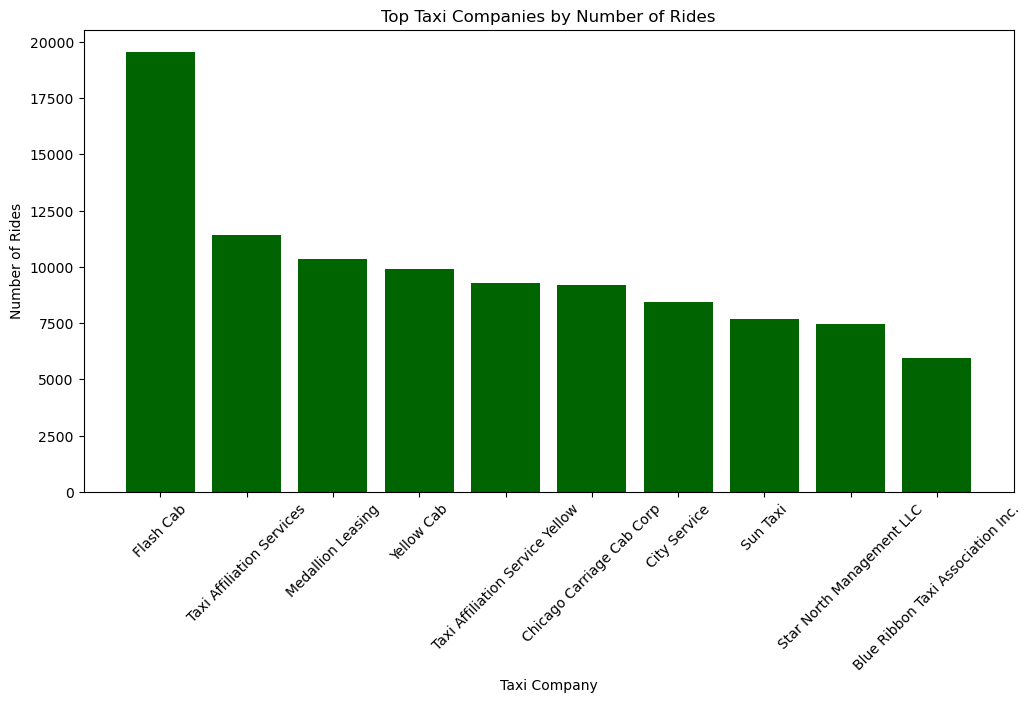

In [20]:
plt.figure(figsize=(12,6))
plt.bar(top_taxi_companies['company_name'], top_taxi_companies['trips_amount'], color='darkgreen')
plt.ylabel("Number of Rides")
plt.xlabel("Taxi Company")
plt.title("Top Taxi Companies by Number of Rides")
plt.xticks(rotation=45)
plt.show()

The graph shows that Flash Cab dominates the taxi market with the highest number of rides, followed by Taxi Affiliation Services and Medallion Leasing, while smaller companies have significantly fewer trips, indicating market concentration among a few major companies.

In [21]:
top_10_dropoff = result_02.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_dropoff)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


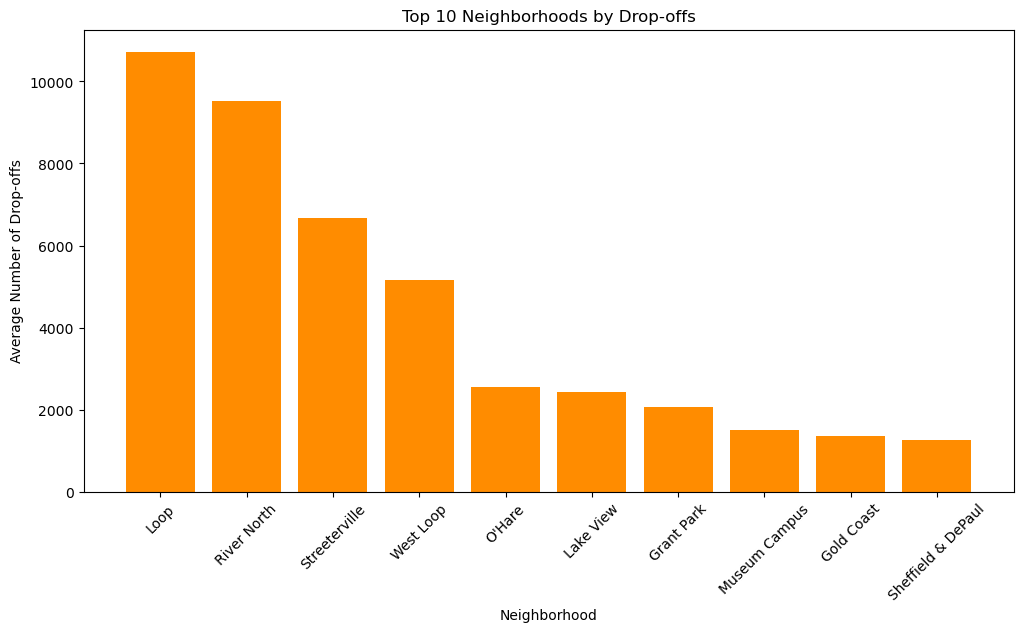

In [22]:
plt.figure(figsize=(12,6))
plt.bar(top_10_dropoff['dropoff_location_name'], top_10_dropoff['average_trips'], color='darkorange')
plt.ylabel("Average Number of Drop-offs")
plt.xlabel("Neighborhood")
plt.title("Top 10 Neighborhoods by Drop-offs")
plt.xticks(rotation=45)
plt.show()

The graph indicates that the Loop and River North neighborhoods have the highest average number of taxi drop-offs, suggesting they are major commercial or business hubs, while other areas like O'Hare, Hyde Park and the rest of the areas see significantly fewer drop-offs, indicating less taxi demand in those regions.

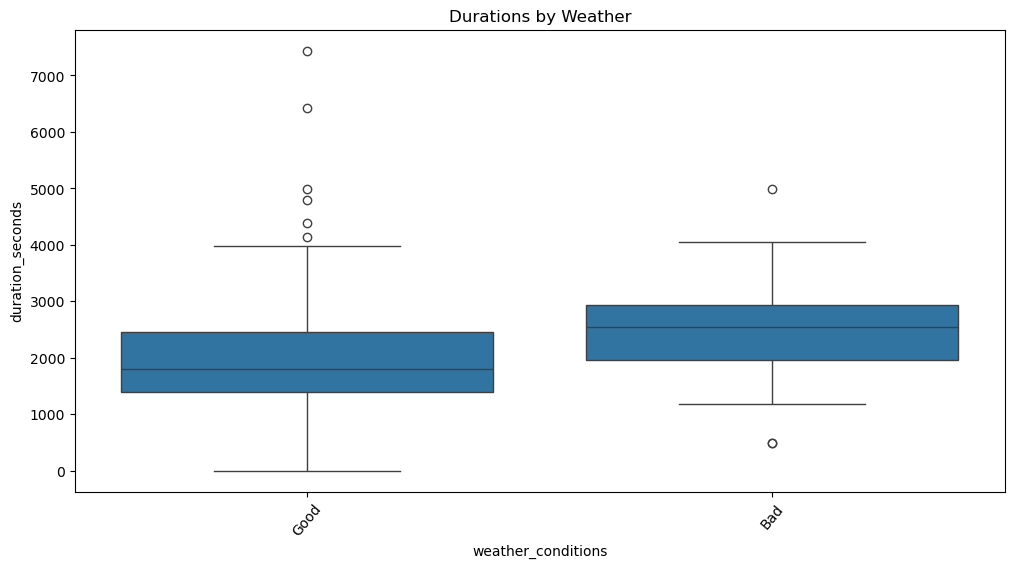

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=result_03)
plt.title('Durations by Weather')
plt.xticks(rotation=50)
plt.show()

On this graph it shows that there are more outliers on good weather_conditions then on bad weather_conditions.

In [24]:
result_saturday = result_03[result_03['dow'] == 'Saturday']
good_weather = result_saturday[result_saturday['weather_conditions'] == 'Good']['duration_seconds']
bad_weather = result_saturday[result_saturday['weather_conditions'] == 'Bad']['duration_seconds']

results = ttest_ind(good_weather, bad_weather, equal_var = False)
alpha = 0.05
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('No rejection to null hypothesis')

p-value: 6.738994326108734e-12
We reject the null hypothesis


The null hypothesis assumed no significant difference in trip duration on Saturdays between good and bad weather conditions, while the alternative hypothesis proposed a significant difference. A two-sample independent t-test was used with a significance level of 0.05, and since the p-value was extremely low the null hypothesis was rejected, indicating that weather conditions significantly impact trip duration on Saturdays.

# General Conclusion

Through my analysis of taxi trip data, I found that Flash Cab dominates the market with the highest number of rides, while other companies have significantly fewer trips. The most popular drop-off locations, such as Loop and River North, indicate high taxi demand in commercial and business districts. Additionally, my statistical test on trip durations showed that weather conditions significantly impact travel times on Saturdays, suggesting that bad weather leads to longer trips. These insights can help optimize taxi operations, improve service efficiency, and better understand how external factors influence ride demand.